#### Author: Abhishek Sharma

#### Program: Visualization on Climate Change Data (Earth Surface Tempreature) by Berkeley Earth

#### Last Modified: 3 November 2017

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data: Global Land Tempreature By Major City.

Analysis on how tempreature was changing in each season.

In [47]:
city_temp = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')
city_temp.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [48]:
city_temp = city_temp[['dt','City','AverageTemperature']]
city_temp['dt'] = pd.to_datetime(city_temp['dt'])
city_temp['year'] = city_temp['dt'].map(lambda x:x.year)
city_temp['month'] = city_temp['dt'].map(lambda x:x.month)
city_temp = city_temp[['year','month','City','AverageTemperature']]
def season_(month):
    if month >=3 and month <=5:
        return 'spring'
    elif month >=6 and month <=8:
        return 'summer'
    elif month >=9 and month <=11:
        return 'antumn'
    else:
        return 'winter'
city_temp['season'] = city_temp['month'].apply(season_)
city_temp.head(5)

,year,month,City,AverageTemperature,season
0,1849,1,Abidjan,26.704,winter
1,1849,2,Abidjan,27.434,winter
2,1849,3,Abidjan,28.101,spring
3,1849,4,Abidjan,26.140,spring
4,1849,5,Abidjan,25.427,spring


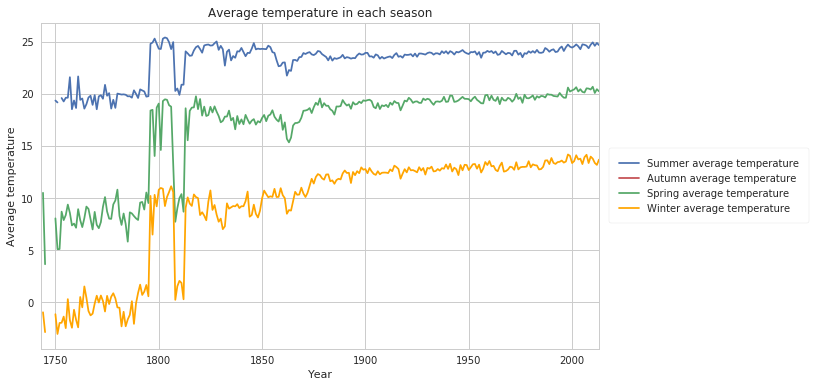

In [70]:
min_year = city_temp['year'].min()
max_year = city_temp['year'].max()
years = range(min_year, max_year + 1)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = city_temp[city_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())

sns.set(style="whitegrid")
sns.set_color_codes("deep")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summer average temperature', color='b')
plt.plot(years, autumn_temps, label='Autumn average temperature', color='r')
plt.plot(years, spring_temps, label='Spring average temperature', color='g')
plt.plot(years, winter_temps, label='Winter average temperature', color='orange')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
